In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


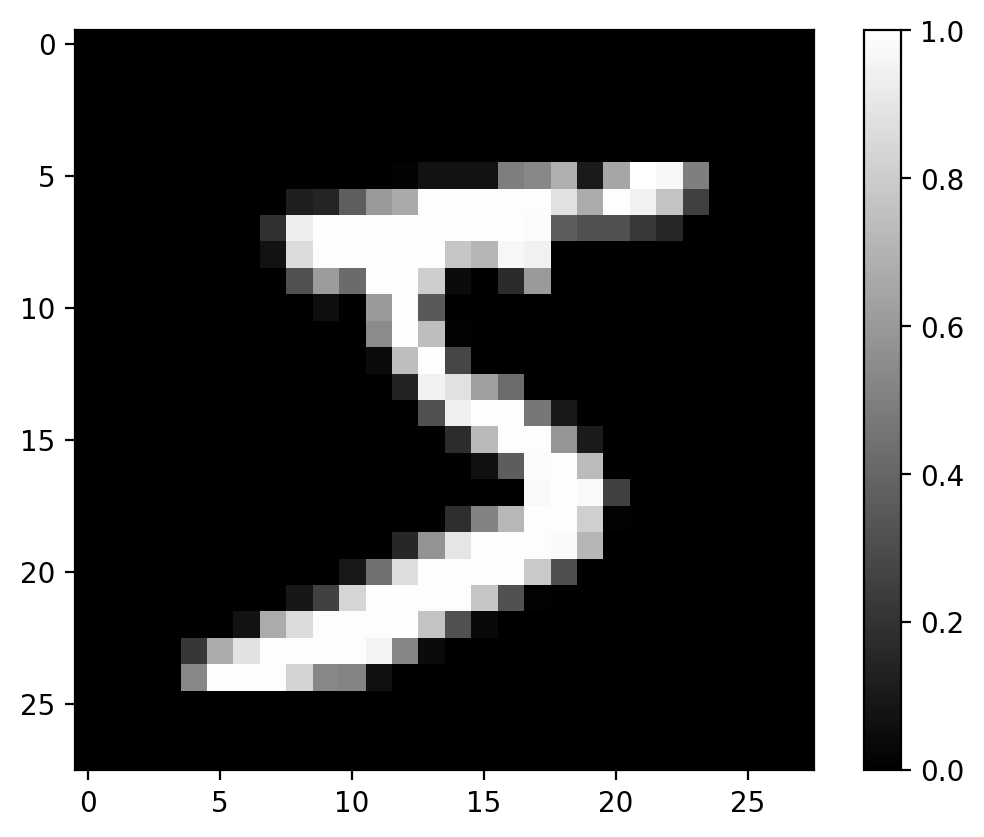

5


In [4]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.imshow(train_X[0].reshape(28,28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [5]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28* 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0849
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0197
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0127
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0102
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0089
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0081
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0075
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0071
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0067
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0064


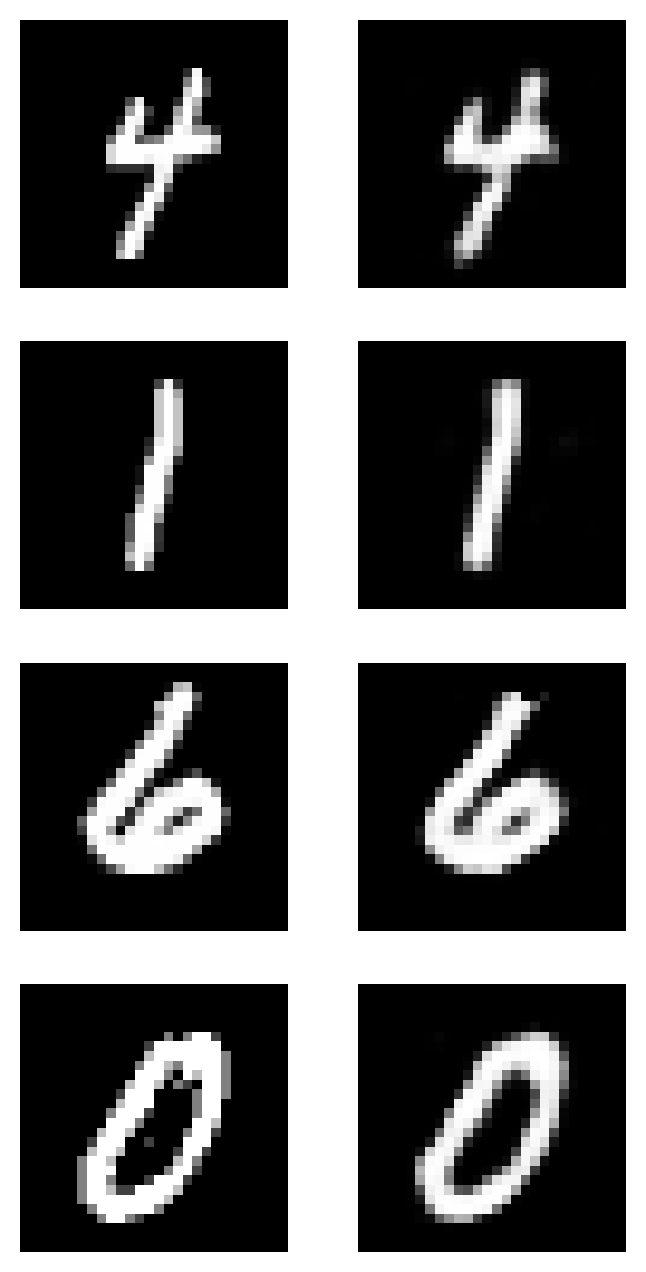

313/313 [==============================] - 0s 999us/step - loss: 0.0061


0.0061195180751383305

In [7]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

In [13]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_10 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 32)       

In [14]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 9s 36ms/step - loss: 0.1102
Epoch 2/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0392
Epoch 3/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0261
Epoch 4/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0230
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0218
Epoch 6/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0210
Epoch 7/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0205
Epoch 8/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0202
Epoch 9/20
235/235 [==============================] - 8s 36ms/step - loss: 0.0199
Epoch 10/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0196
Epoch 11/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0196
Epoch 12/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0194
Epoch 13/20
2

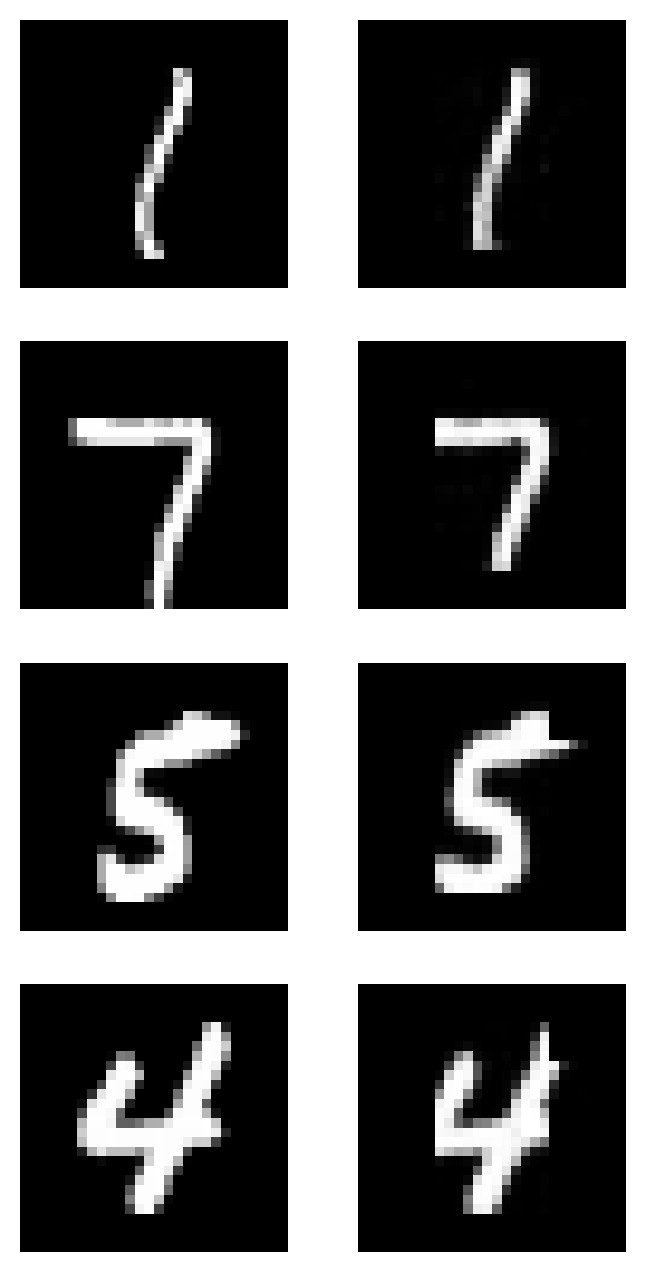

313/313 [==============================] - 1s 2ms/step - loss: 0.0183


0.01831521838903427

In [15]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

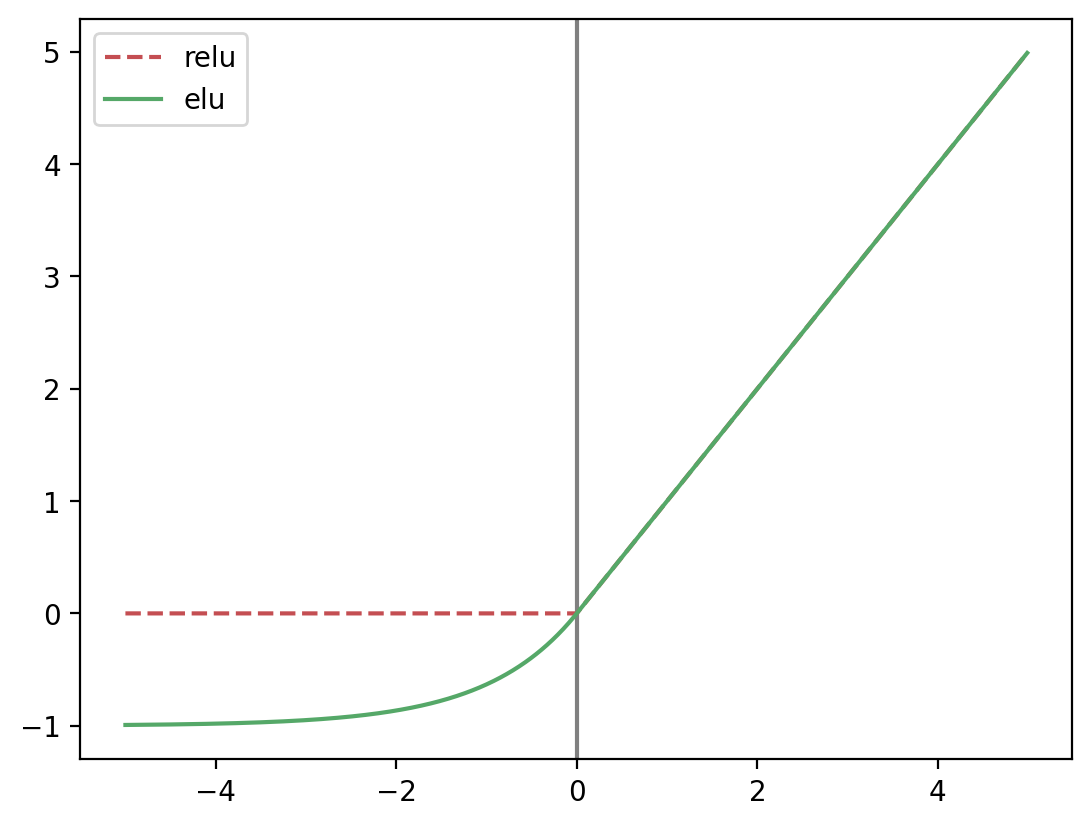

In [16]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [17]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 10s 40ms/step - loss: 0.0905
Epoch 2/20
235/235 [==============================] - 9s 39ms/step - loss: 0.0193
Epoch 3/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0115
Epoch 4/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0093
Epoch 5/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0083
Epoch 6/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0077
Epoch 7/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0073
Epoch 8/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0070
Epoch 9/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0067
Epoch 10/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0065
Epoch 11/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0063
Epoch 12/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0061
Epoch 13/20


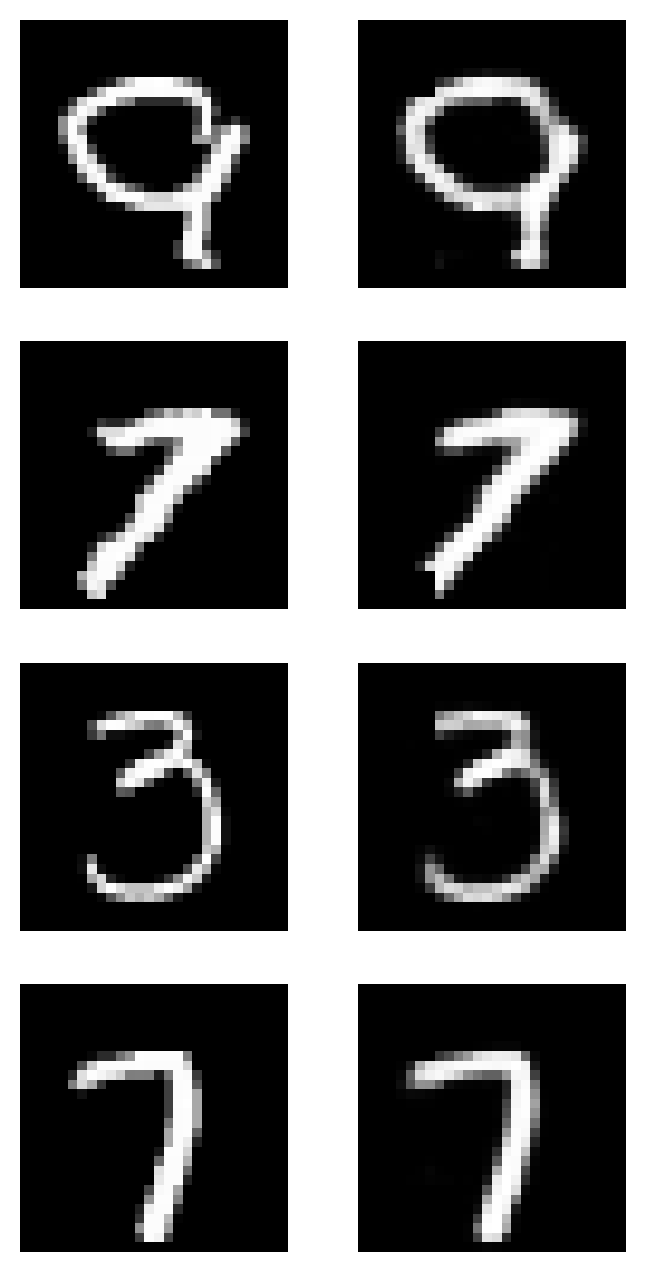

313/313 [==============================] - 1s 3ms/step - loss: 0.0053


0.005319108255207539

In [18]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)